[Our task](../02/sampling_problem) has been to reply to the Supreme Court on
their judgment in the appeal of Robert Swain.

Remember, Robert Swain appealed his death sentence, for rape, on the
basis that the jury selection was biased against black people.

His trial had a jury pool, of 100, from which the jury had to be selected.
That jury pool should have been representative of the local population.

The jury pool had 8 black people, but the local population was 26% black.

If the jury pool had been representative, we would expect about 26 of 100
people to be black.  Our question is what we mean by *about* 26 of 100.

The Supreme Court thought that the difference between expected (26) and actual
(8) was small. But was it?  Does 8 of 100 fit somewhere in our description of
*about* 26 of 100?

To answer this, we are going to *simulate* making a jury pool.

Our *model* is that each juror has been randomly selected from the population.
That is, for any one juror, there is a 0.26 probability that they are black.

First we make one jury pool, of 100, to remind ourselves of the task.

Then we make 10 jury pools of 100, to get warmed up.

Finally we make 10000 jury pools, each of 100 members, and see what we get.

In [1]:
# Import the array library
import numpy as np

Here is one jury pool, and the number of black people we get in our simulation.

In [2]:
# Make 100 random integers from 0 through 99
randoms = np.random.randint(0, 100, size=100)
# Say values < 26 correspond to black jurors.
black_yn = randoms < 0.26
# We now have True for black jurors and False otherwise.
# Count the number of Trues
np.count_nonzero(black_yn)

0

That is one estimate, for the number of black people we can expect, if our
model is correct.  Call this one *trial*. We can run that a few times to get a
range of values.   If we run it only a few times, we might be unlucky, and get
some results that are not representative.  It is safer to run it a huge number
of times, to make sure we've got an idea of the variation.

Next we get ready to store the results of each estimate.

In [3]:
# Make an empty counts array, to append to.
counts = np.array([])

We repeat the code from the cell above, but now, we append to the `counts` array:

In [4]:
randoms = np.random.randint(0, 100, size=100)
black_yn = randoms < 0.26
count = np.count_nonzero(black_yn)
counts = np.append(counts, count)
counts

array([0.])

Run the cell above a few times, perhaps with Control-Enter, to see the `counts` array extending, for each time we run the cell.

Now we collect the result of many trials, by using a for loop.

We will start by making 10 jury pools, to get warmed up.  Later we will use
a much higher number.

In [5]:
# Make a new empty counts array, to append to.
counts = np.array([])
for i in np.arange(100):
    # This code is the same as the cell above, but indented,
    # so we run it all, for each time through the for loop.
    randoms = np.random.randint(0, 100, size=100)
    black_yn = randoms < 0.26
    count = np.count_nonzero(black_yn)
    counts = np.append(counts, count)
counts

array([1., 0., 0., 2., 3., 0., 1., 0., 1., 0., 2., 2., 1., 0., 1., 1., 1.,
       0., 2., 0., 2., 1., 1., 1., 2., 2., 2., 0., 0., 1., 1., 2., 7., 0.,
       0., 1., 3., 4., 2., 0., 1., 1., 2., 2., 0., 0., 2., 0., 2., 3., 0.,
       1., 0., 1., 1., 0., 1., 1., 2., 0., 0., 2., 0., 0., 2., 2., 0., 1.,
       0., 2., 1., 0., 0., 2., 0., 1., 1., 0., 3., 3., 2., 1., 2., 2., 1.,
       0., 1., 2., 2., 2., 0., 1., 0., 1., 0., 0., 2., 2., 0., 3.])

Each of these values is one estimate for how many black jurors we should
expect, if our model is right.  Already we get the feeling that 8 is rather
unlikely, if our model is correct.  But - how unlikely?

To get a better estimate, let us do the same thing, but with 10000 jury pools,
and therefore, 10000 estimates.

In [6]:
# Make a new empty counts array, to append to.
counts = np.array([])
for i in np.arange(10000):
    # This code is the same as the cell above, but indented,
    # so we run it all, for each time through the for loop.
    randoms = np.random.randint(0, 100, size=100)
    black_yn = randoms < 0.26
    count = np.count_nonzero(black_yn)
    counts = np.append(counts, count)
counts

array([0., 2., 1., ..., 4., 1., 0.])

If you ran this cell yourself, you will notice that it runs very fast, in much
less than a second, on a reasonable laptop.

We now have 10000 estimates, one for each row in the original array, and
therefore, one for each simulated jury pool.

Remember, the function `len` shows us the length of the array, and therefore,
the number of values in this one-dimensional array.

In [7]:
len(counts)

10000

Next we want to have a look at the spread of these values.  To do this, we plot
a histogram.  Here is how to do that, in Python.  Don't worry about the details, we will go into this more soon.

In [8]:
# Please don't worry about this bit of code for now.
# It sets up plotting in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
# Fancy plots
plt.style.use('fivethirtyeight')

Now show the histogram.

(array([3604., 3735.,    0., 1870.,    0.,  606.,  147.,    0.,   34.,
           4.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

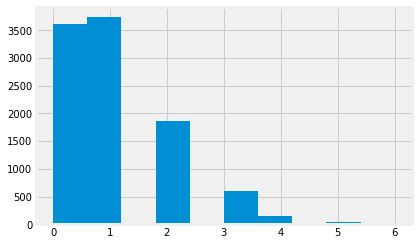

In [9]:
# Do the histogram of our 10000 estimates.
plt.hist(counts)

It looks as if 8 is nowhere on the spread of our estimates.  How many times did
we get a value less than or equal to 8, in all our 10000 estimates?

In [10]:
counts_are_low = counts <= 8
np.count_nonzero(counts_are_low)

10000

In 10000 random jury pools, we never see a value as low as 8.  We can ask Numpy
to show us the minimum value that we do see, by using the `np.min` function:

In [11]:
np.min(counts)

0.0

We have run an analysis assuming that the jurors were selected at random.  On
that assumption, a count of 8 jurors in 1000 is incredibly unlikely.  It is so
unlikely, that we never get a number as low as 8, in 10000 repeats.   That
makes us think that the probability of getting 8 black people in a jury pool of
100, is less than 1 in 10000 or:

In [12]:
1 / 10000

0.0001